# <center> Activity 10 </center>

# <h1> 01 Scikit Learn</h1>

## Excercise 1

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine , load_digits , load_breast_cancer,load_boston,make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,mean_absolute_error,mean_squared_error
from sklearn import tree , linear_model
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from scipy.spatial.distance import cdist

In [2]:
data = load_wine()


In [3]:
X = pd.DataFrame(data.data)
Y = pd.DataFrame(data.target)
print(X.shape,Y.shape)

(178, 13) (178, 1)


In [4]:
X,X_test,Y,Y_test = train_test_split(X,Y,test_size=0.2)

In [5]:
X_train,X_dev,Y_train,Y_dev = train_test_split(X,Y,test_size=36/142)

## Excercise 2

In [6]:
kf = KFold(n_splits=10)

In [7]:
splits = kf.split(X)

In [8]:
for train_index, test_index in splits: 
    X_train, X_dev = X.iloc[train_index,:],  X.iloc[test_index,:] 
    Y_train, Y_dev = Y.iloc[train_index,:],Y.iloc[test_index,:] 


In [9]:
print(X_train.shape, Y_train.shape, X_dev.shape, Y_dev.shape, X_test.shape, Y_test.shape)

(128, 13) (128, 1) (14, 13) (14, 1) (36, 13) (36, 1)


## Excercise 3

In [10]:
digits = load_digits()

In [11]:
X = pd.DataFrame(digits.data)
Y = pd.DataFrame(digits.target)
print(X.shape,Y.shape)

(1797, 64) (1797, 1)


In [12]:
X,X_test,Y,Y_test = train_test_split(X,Y,test_size=0.2)
X_train,X_dev,Y_train,Y_dev = train_test_split(X,Y,test_size=36/142)

In [13]:
kf = KFold(n_splits=10)

In [14]:
splits = kf.split(X)

In [15]:
for train_index, test_index in splits: 
    X_train, X_dev = X.iloc[train_index,:],  X.iloc[test_index,:] 
    Y_train, Y_dev = Y.iloc[train_index,:],Y.iloc[test_index,:] 


In [16]:
print(X_train.shape, Y_train.shape, X_dev.shape, Y_dev.shape, X_test.shape, Y_test.shape)

(1294, 64) (1294, 1) (143, 64) (143, 1) (360, 64) (360, 1)


## Excercisse 4

In [17]:
data = load_breast_cancer() 
X = pd.DataFrame(data.data) 
Y = pd.DataFrame(data.target)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1)

In [19]:
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [20]:
confusion_matrix(Y_test,Y_pred)

array([[17,  2],
       [ 1, 37]])

In [21]:
accuracy = accuracy_score(Y_test, Y_pred) 
print("accuracy:", accuracy) 
precision = precision_score(Y_test, Y_pred) 
print("precision:", precision) 
recall = recall_score(Y_test, Y_pred) 
print("recall:", recall) 

accuracy: 0.9473684210526315
precision: 0.9487179487179487
recall: 0.9736842105263158


## Excercise 5 

In [22]:
data = load_boston() 
X = pd.DataFrame(data.data) 
Y = pd.DataFrame(data.target)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1,random_state=0)

/home/dt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [23]:
model = linear_model.LinearRegression() 
model = model.fit(X_train, Y_train) 
Y_pred = model.predict(X_test) 

In [24]:
MAE = mean_absolute_error(Y_test, Y_pred) 
print("MAE:", MAE) 
RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE:", RMSE)

MAE: 3.9357920841192966
RMSE: 6.459456343676129


## Excercise 6 

In [25]:
digits = load_digits()
X = pd.DataFrame(digits.data)
Y = pd.DataFrame(digits.target)
print(X.shape,Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1,random_state=0)

(1797, 64) (1797, 1)


In [26]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train) 
Y_pred = model.predict(X_test) 

In [27]:
accuracy = accuracy_score(Y_test, Y_pred) 
print("accuracy:", accuracy) 

accuracy: 0.8611111111111112


In [28]:
Y_test_2 = Y_test[:] 
Y_test_2[Y_test_2 != 6] = 1 
Y_test_2[Y_test_2 == 6] = 0 
Y_pred_2 = Y_pred 
Y_pred_2[Y_pred_2 != 6] = 1 
Y_pred_2[Y_pred_2 == 6] = 0 

In [29]:
precision = precision_score(Y_test, Y_pred) 
print("precision:", precision) 
recall = recall_score(Y_test, Y_pred) 
print("recall:", recall) 

precision: 0.9871794871794872
recall: 0.9935483870967742


# 02 Linear Regression

## Excercise 1

In [30]:
df = pd.read_csv('./Activity 10 (29Oct2022)-20221029T105210Z-001/synth_temp.csv')
df.head()

,Region,Year,RgnAvTemp
0,A,1841,12.557395
1,B,1841,13.267048
2,E,1841,12.217463
3,F,1841,13.189420
4,A,1842,13.462887


There are 4 points in 1841
and 12 points in 2010
and 12 points in 1902


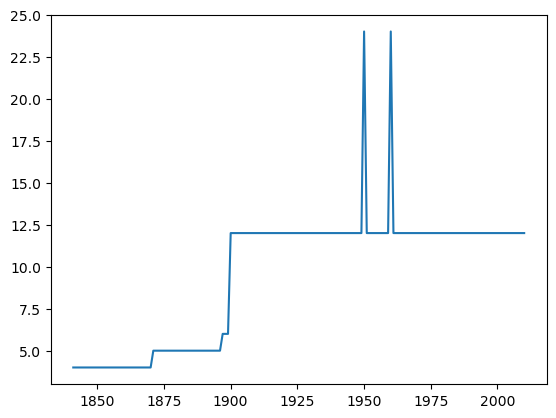

In [32]:
print('There are ' + str(len(df.loc[df['Year'] == 1841])) + ' points in 1841\n' + 'and ' + str(len(df.loc[df['Year'] == 2010])) + ' points in 2010\n' + 'and ' + str(len(df.loc[df['Year'] ==1902])) + ' points in 1902') 
fig, ax = plt.subplots() 
ax.plot(df['Year'].unique(), [len(df.loc[df['Year'] == i]) for i in df['Year'].unique()]) 
plt.show()

In [33]:
df = df.loc[df.Year > 1901] 
df.head() 

,Region,Year,RgnAvTemp
292,A,1902,17.021583
293,B,1902,17.590253
294,C,1902,17.493082
295,D,1902,18.706166
296,E,1902,17.390903


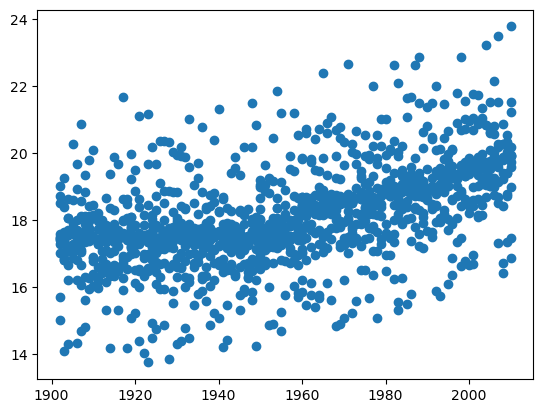

In [34]:
fig, ax = plt.subplots() 
ax.scatter(df.Year, df.RgnAvTemp) 
plt.show() 

In [35]:
df_group_year = (df.groupby('Year').agg('mean').rename(columns = {'RgnAvTemp' : 'AvgTemp'})) 
print(df_group_year.head()) 
print(df_group_year.tail())

        AvgTemp
Year           
1902  17.385044
1903  17.222163
1904  17.217215
1905  17.817502
1906  17.386445
        AvgTemp
Year           
2006  19.904999
2007  19.820224
2008  19.245558
2009  19.537290
2010  19.919115


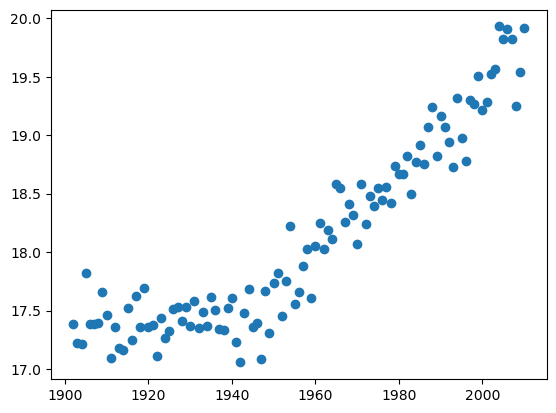

In [36]:
fig, ax = plt.subplots() 
ax.scatter(df_group_year.index, 
df_group_year['AvgTemp']) 
plt.show()

In [37]:
window = 10 
smoothed_df = pd.DataFrame(df_group_year.AvgTemp.rolling(window).mean()) 
smoothed_df.colums = 'AvgTemp' 
print(smoothed_df.head(14)) 
print(smoothed_df.tail())

        AvgTemp
Year           
1902        NaN
1903        NaN
1904        NaN
1905        NaN
1906        NaN
1907        NaN
1908        NaN
1909        NaN
1910        NaN
1911  17.401761
1912  17.398872
1913  17.394177
1914  17.388443
1915  17.358825
        AvgTemp
Year           
2006  19.531170
2007  19.583102
2008  19.581256
2009  19.584580
2010  19.654919


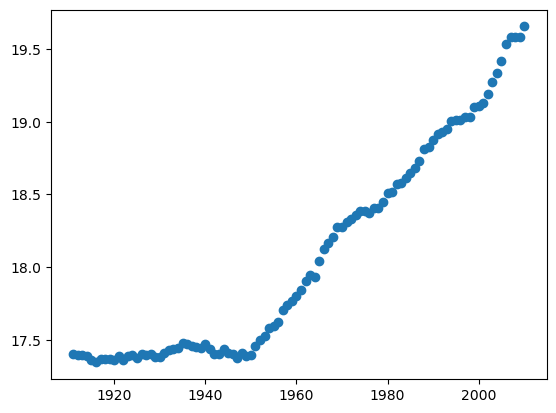

In [38]:
smoothed_df = smoothed_df[smoothed_df['AvgTemp'].notnull()] 

fig, ax = plt.subplots() 
ax.scatter(smoothed_df.index, 
smoothed_df['AvgTemp']) 
plt.show()

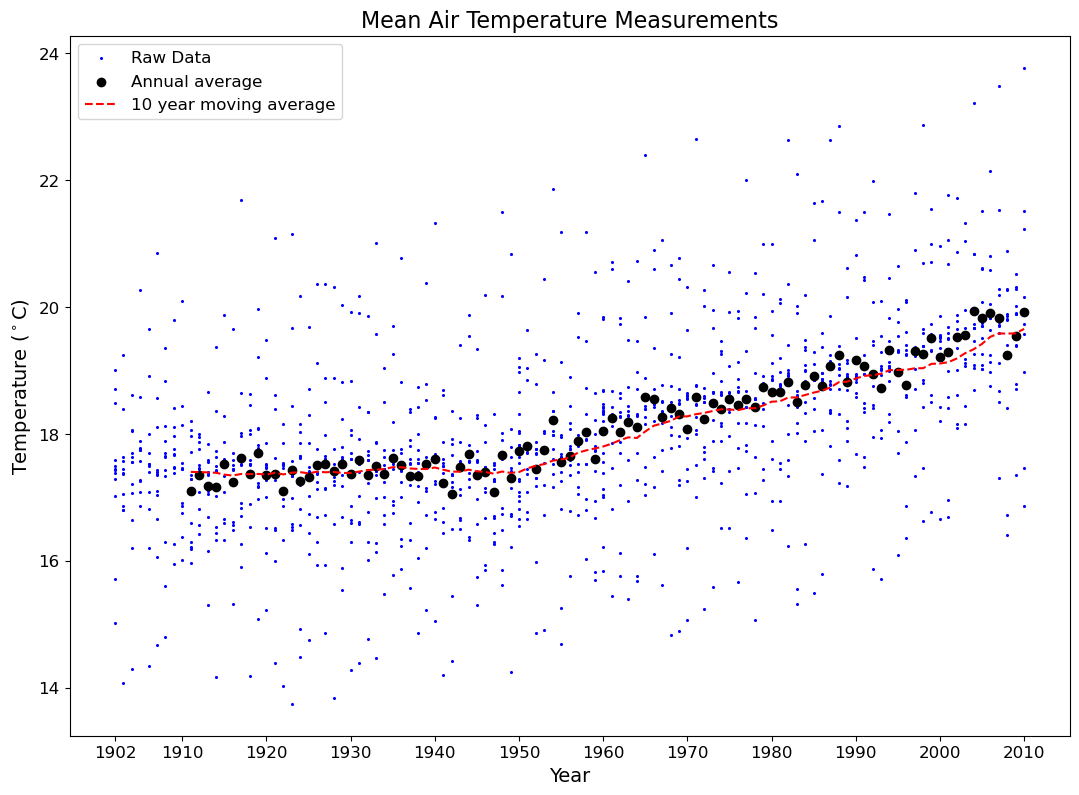

In [40]:
fig = plt.figure(figsize=(10, 7)) 
ax = fig.add_axes([1, 1, 1, 1]); 
# Raw data 
raw_plot_data = df[df.Year > 1901] 
ax.scatter(raw_plot_data.Year,  raw_plot_data.RgnAvTemp, label = 'Raw Data', c = 'blue', s = 1.5)

annual_plot_data = df_group_year.filter(items = 
smoothed_df.index, axis = 0) 
ax.scatter(annual_plot_data.index, annual_plot_data.AvgTemp, label = 'Annual average', c = 'k') 
# Moving averages 
ax.plot(smoothed_df.index, 
smoothed_df.AvgTemp, c = 'r', linestyle = '--', label = f'{window} year moving average') 
ax.set_title('Mean Air Temperature Measurements', fontsize = 16) 

tick_years = [1902] + list(range(1910, 
2011, 10)) 
ax.set_xlabel('Year', fontsize = 14) 
ax.set_ylabel('Temperature ($^\circ$C)', 
fontsize = 14) 
ax.set_xticks(tick_years) 
ax.tick_params(labelsize = 12) 
ax.legend(fontsize = 12) 
plt.show() 
 


## Excercise 2

In [42]:
df = pd.read_csv('./Activity 10 (29Oct2022)-20221029T105210Z-001/synth_temp.csv')


In [43]:
df = df.loc[df.Year > 1901] 
df_group_year = df.groupby(['Year']).agg({'RgnAvTemp' : 'mean'}) 
df_group_year.head(12) 

df_group_year['Year'] = df_group_year.index 
df_group_year = df_group_year.rename(columns = {'RgnAvTemp' : 'AvTemp'}) 
df_group_year.head() 

,AvTemp,Year
Year,,
1902,17.385044,1902
1903,17.222163,1903
1904,17.217215,1904
1905,17.817502,1905
1906,17.386445,1906


In [44]:
linear_model = linear_model.LinearRegression(fit_intercept = True) 
linear_model.fit(df_group_year['Year'].values.reshape((-1, 1)), df_group_year.AvTemp) 
print('model slope = ', 
linear_model.coef_[0]) 
print('model intercept = ', 
linear_model.intercept_) 
r2 = linear_model.score(df_group_year['Year'] .values.reshape((-1, 1)), df_group_year.AvTemp) 
print('r squared = ', r2) 

model slope =  0.023522370249706537
model intercept =  -27.887365027932873
r squared =  0.8438499294671092


In [45]:
pred_X = df_group_year.loc[:, 'Year'] 
pred_Y = linear_model.predict(df_group_year['Year'].values.reshape((-1, 1)))

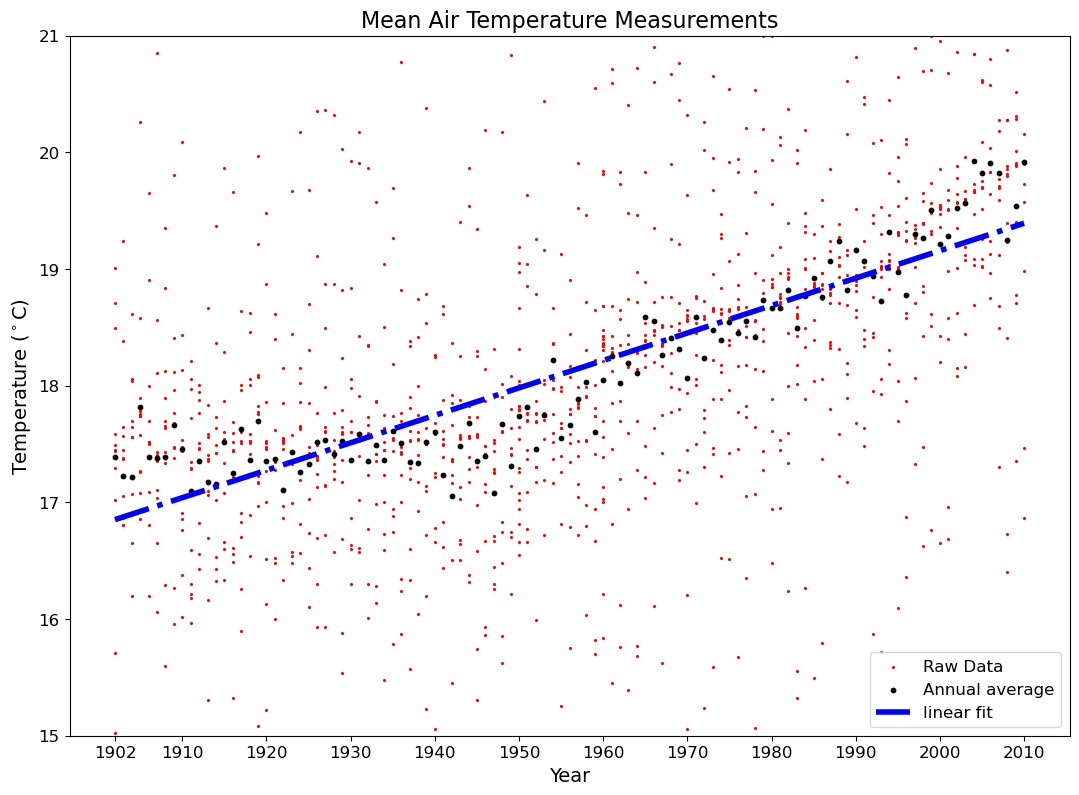

In [46]:
fig = plt.figure(figsize=(10, 7)) 
ax = fig.add_axes([1, 1, 1, 1]); 
# Raw data 
raw_plot_data = df[df.Year > 1901] 
ax.scatter(raw_plot_data.Year, 
raw_plot_data.RgnAvTemp, label = 'Raw Data', c = 'red', s = 1.5) 
# Annual averages 
ax.scatter(df_group_year.Year, 
df_group_year.AvTemp, label = 'Annual average', c = 'k', s = 10) 
# linear fit 
ax.plot(pred_X, pred_Y, c = "blue", linestyle = '-.', linewidth = 4, label = 'linear fit') 
ax.set_title('Mean Air Temperature Measurements', fontsize = 16) 

tick_years = [1902] + list(range(1910, 2011, 10)) 
ax.set_xlabel('Year', fontsize = 14) 
ax.set_ylabel('Temperature ($^\circ$C)', 
fontsize = 14) 
ax.set_ylim(15, 21) 
ax.set_xticks(tick_years) 
ax.tick_params(labelsize = 12) 
ax.legend(fontsize = 12) 
plt.show() 

# 03 K Means

## Excercise 1

In [48]:
X, y = make_blobs(n_samples=1500, 
centers=3, n_features=2, 
random_state=800) 
centroids = [[-6,2],[3,-4],[-5,10]]

In [49]:
X

array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

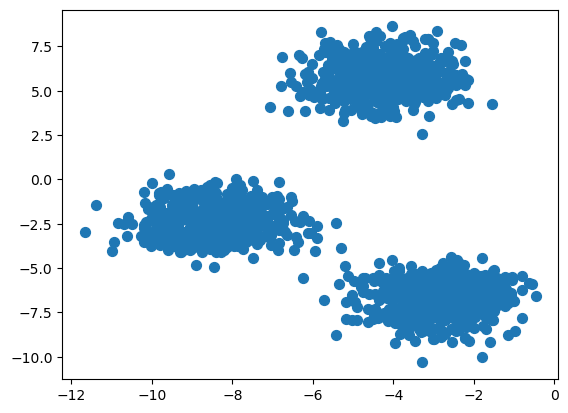

In [50]:
plt.scatter(X[:, 0], X[:, 1], s=50, 
cmap='tab20b') 
plt.show()

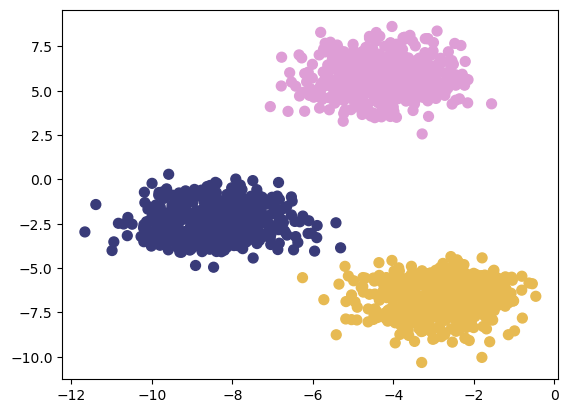

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y,s=50, 
cmap='tab20b') 
plt.show()

## Excercise 2

In [53]:
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

In [54]:
for x in X[105:110]: calcs = cdist(x.reshape([1,-1]),centroids).squeeze() 
print(calcs, "Cluster Membership: ", 
np.argmin(calcs))

[ 6.29310516 13.46792103  2.66429839] Cluster Membership:  2


In [61]:
def k_means(X, K): 
     
    centroids_history = [] 
    labels_history = [] 
    rand_index = np.random.choice(X.shape[0], K) 
    centroids = X[rand_index] 
    centroids_history.append(centroids)
    history = zip(centroids_history, labels_history) 
    for x, y in history: 
        plt.figure(figsize=(4,3)) 
        plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20b'); 
        plt.scatter(x[:, 0], x[:, 1], c='red') 
        plt.show()

In [65]:
k_means(X=X,K=5)